# Visualize Demand Distributions

This notebook explores and visualizes ride demand patterns across NYC zones and hours. 

Goals:
- Understand the distribution of demand overall and per zone
- Examine temporal patterns (hour of day, day of week, weekday/weekend)
- Identify high-demand zones and extreme peaks

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

AGG_PATH = "../../data/processed/nyc_demand_zone_hour_2019_q1.parquet"

In [4]:
# Show all columns
pd.set_option("display.max_columns", None)

In [5]:
# Load aggregated dataset
df = pd.read_parquet(AGG_PATH)
df.head()

,zone_id,pickup_hour_ts,demand,avg_fare,avg_distance,hour,day_of_week,is_weekend,day,month
0,1,2019-01-01 10:00:00,2,61.25,16.90,10,1,0,1,1
1,1,2019-01-01 12:00:00,1,135.00,19.30,12,1,0,1,1
2,1,2019-01-01 15:00:00,1,106.00,41.28,15,1,0,1,1
3,1,2019-01-02 02:00:00,1,30.00,1.27,2,2,0,2,1
4,1,2019-01-02 03:00:00,1,15.00,12.65,3,2,0,2,1


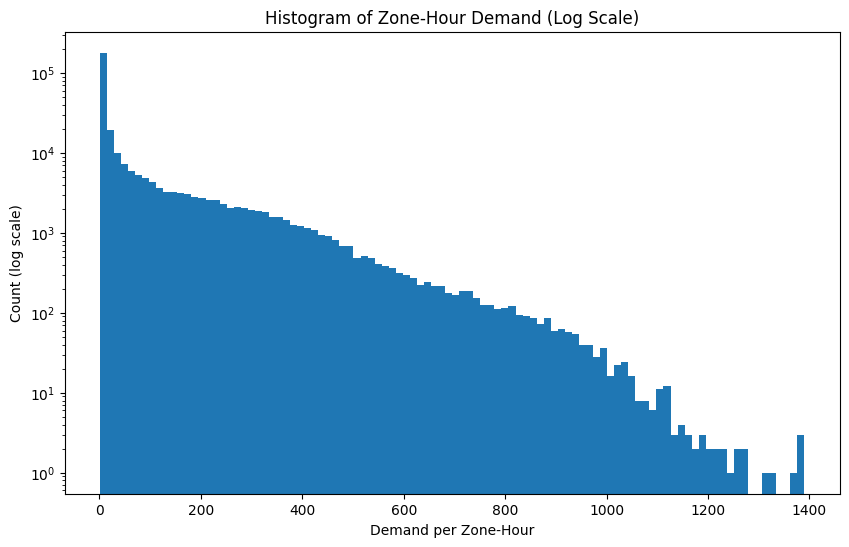

In [6]:
# Histogram of overall demand
plt.figure(figsize=(10,6))
plt.hist(df["demand"], bins=100, log=True)
plt.xlabel("Demand per Zone-Hour")
plt.ylabel("Count (log scale)")
plt.title("Histogram of Zone-Hour Demand (Log Scale)")
plt.show()

### Histogram of Overall Demand

- Most zone-hour combinations have low demand.
- A small fraction of observations show extremely high demand.
- Log scale highlights the long tail and peak variability.

This confirms the heavy right-skew observed in descriptive statistics and highlights the importance of robust modeling.

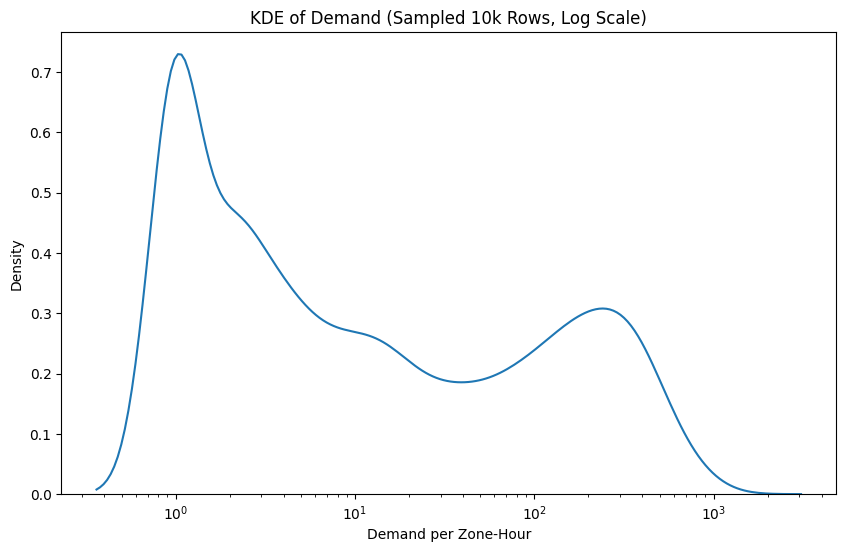

In [8]:
sample_df = df["demand"].sample(n=10000, random_state=42)

import seaborn as sns
plt.figure(figsize=(10,6))
sns.kdeplot(sample_df, log_scale=True)
plt.xlabel("Demand per Zone-Hour")
plt.title("KDE of Demand (Sampled 10k Rows, Log Scale)")
plt.show()

### Kernel Density of Demand (Sampled)
- Due to the large dataset size (~300k rows), we sample 10,000 points for KDE.
- The density plot confirms the long-tailed distribution observed in histograms.
- Sampling preserves the overall shape while keeping plotting fast and responsive.

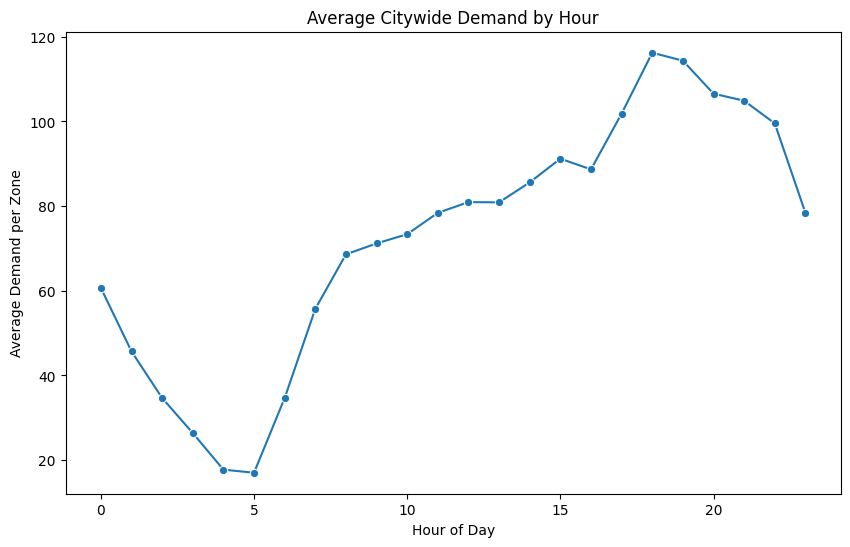

In [9]:
# Demand by hour
hourly_avg = df.groupby("hour")["demand"].mean().reset_index()

plt.figure(figsize=(10,6))
sns.lineplot(x="hour", y="demand", data=hourly_avg, marker="o")
plt.xlabel("Hour of Day")
plt.ylabel("Average Demand per Zone")
plt.title("Average Citywide Demand by Hour")
plt.show()

### Hourly Demand Profile
- Morning rise, midday plateau, evening peak, overnight trough.

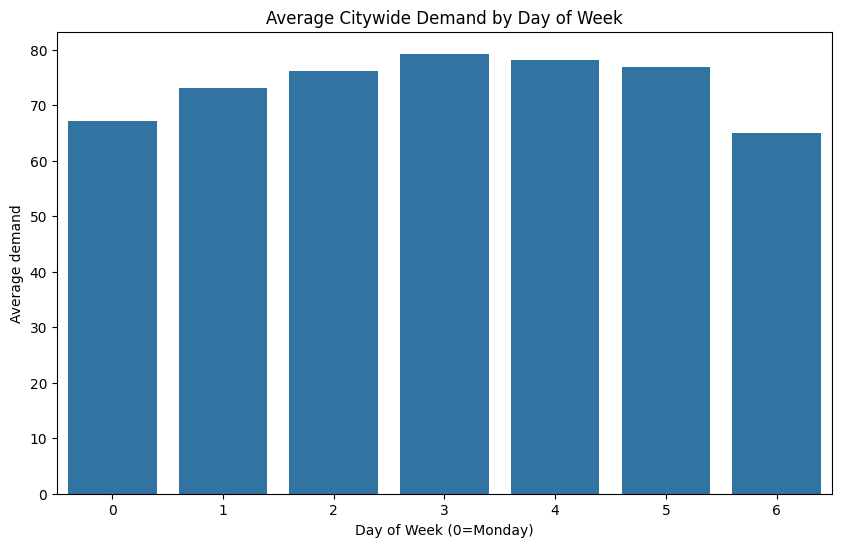

In [13]:
# Demand by day of week
dow_avg = df.groupby("day_of_week")["demand"].mean().reset_index()

plt.figure(figsize=(10,6))
sns.barplot(x="day_of_week", y="demand", data=dow_avg)
plt.xlabel("Day of Week (0=Monday)")
plt.ylabel("Average demand")
plt.title("Average Citywide Demand by Day of Week")
plt.show()

### Demand by Day of Week
- Confirms systematic weekday/weekend behavior.
- Provides insight into how weekly cycles impact demand.

In [15]:
# Hour x Day of week heatmap
pivot = df.pivot_table(index="hour", columns="day_of_week", values="demand", aggfunc="mean")
pivot

day_of_week,0,1,2,3,4,5,6
hour,,,,,,,
0,30.947212,40.348097,41.009880,47.127424,64.059452,93.586207,95.705953
1,19.530278,30.208524,23.774218,27.784848,40.581197,75.787992,85.688483
2,14.128507,22.032046,15.540630,17.830065,25.928626,62.691176,70.771348
3,10.811016,17.289905,11.515179,12.779762,18.100559,44.960000,55.695297
4,11.300638,13.801605,10.758088,11.865484,14.787690,26.039773,32.080940
5,16.884710,17.878363,17.590986,18.437288,18.110629,14.368693,15.065897
6,37.896000,38.725312,39.979497,40.892293,40.008899,21.066748,17.030284
7,59.290483,64.058693,67.245226,69.817747,66.297380,28.483836,23.145161
8,71.982818,80.041610,81.650044,85.630396,81.444198,40.929790,32.831748


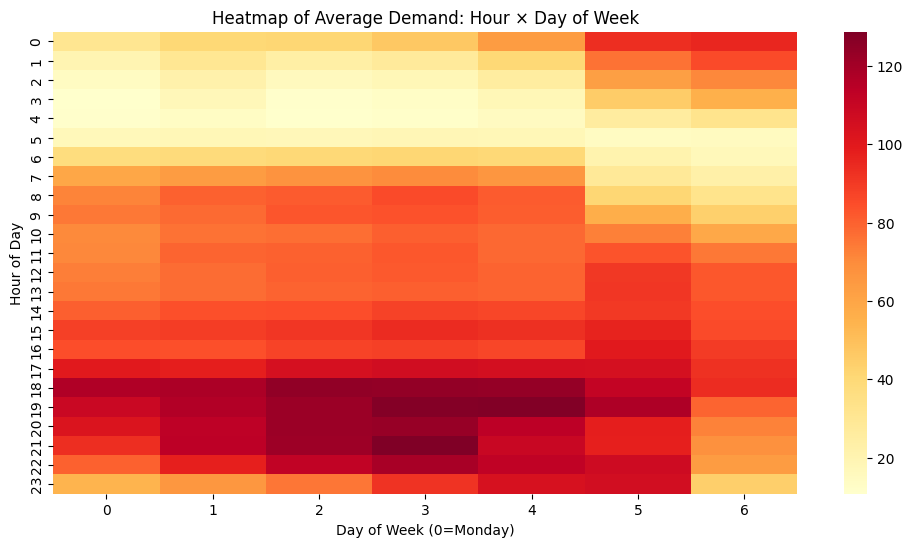

In [16]:
plt.figure(figsize=(12,6))
sns.heatmap(pivot, cmap="YlOrRd")
plt.xlabel("Day of Week (0=Monday)")
plt.ylabel("Hour of Day")
plt.title("Heatmap of Average Demand: Hour × Day of Week")
plt.show()

### Heatmap of Demand (Hour × Day)
- Combines temporal dimensions to reveal patterns.
- Peak hours are concentrated during weekday evenings.
- Weekend behavior shows a shifted peak and lower early-morning demand.

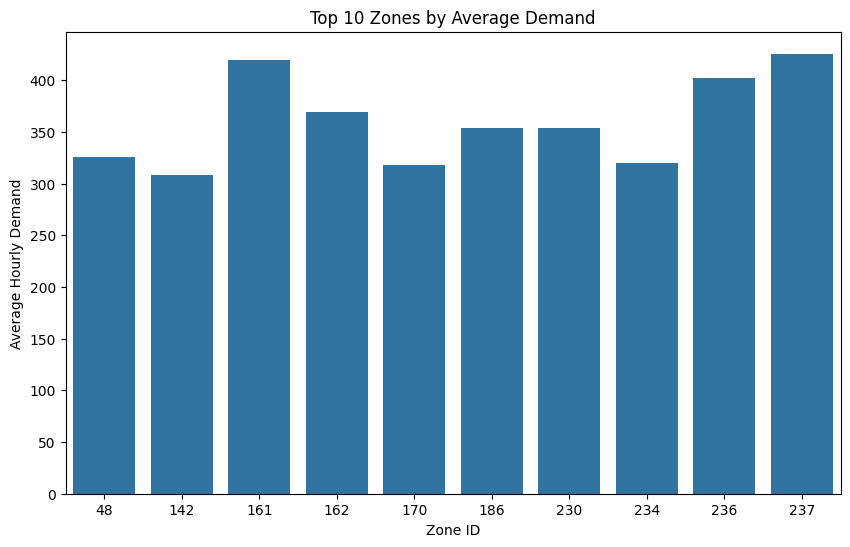

In [17]:
# Top 10 zones by mean demand
top_zones = df.groupby("zone_id")["demand"].mean().nlargest(10).reset_index()

plt.figure(figsize=(10,6))
sns.barplot(x="zone_id", y="demand", data=top_zones)
plt.xlabel("Zone ID")
plt.ylabel("Average Hourly Demand")
plt.title("Top 10 Zones by Average Demand")
plt.show()

### Top Zones by Demand
- A small number of zones dominate citywide demand.
- Justifies zone-specific modeling or clustering.